In [1]:
import os
from dotenv import load_dotenv
from prompt2map import Prompt2Map

load_dotenv()

True

In [2]:
db_name = os.environ.get("DB_NAME")
db_user = os.environ.get("DB_USER")
db_password = os.environ.get("DB_PASSWORD")

p2m = Prompt2Map.from_postgis(db_name, db_user, db_password)

In [3]:
prompt = "Resultados del Partido Socialista en elección de diputados 2017, comunas de Paredones, Lolol, Santa Cruz"
my_map = p2m.to_map(prompt)
my_map

/Users/jm/Code/prompt2map/.conda/lib/python3.12/site-packages/geopandas/io/sql.py:185: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(
/Users/jm/Code/prompt2map/.conda/lib/python3.12/site-packages/geopandas/io/sql.py:473: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(spatial_ref_sys_sql, con)


<class 'folium.folium.Map'>
<class 'plotly.graph_objs._figure.Figure'>
<class 'matplotlib.figure.Figure'>


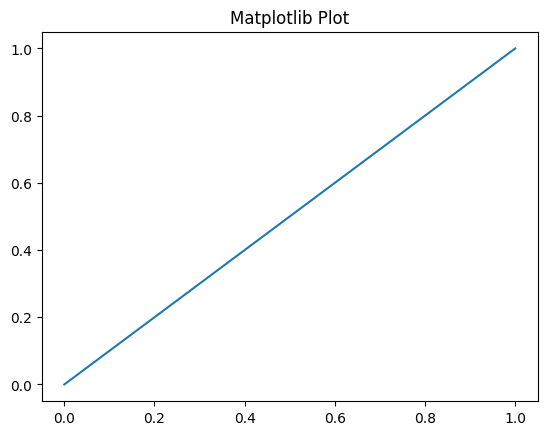

In [1]:
from typing import Literal, overload, Union
import folium
import plotly.graph_objects as go
import matplotlib.pyplot as plt
plt.Figure
# Type aliases for the different return types
FoliumMap = folium.Map
PlotlyFigure = go.Figure
MatplotlibFigure = plt.Figure

Map = FoliumMap | PlotlyFigure | MatplotlibFigure
@overload
def create_map(provider: Literal["folium"]) -> FoliumMap: ...
@overload
def create_map(provider: Literal["plotly"]) -> PlotlyFigure: ...
@overload
def create_map(provider: Literal["matplotlib"]) -> MatplotlibFigure: ...

def create_map(provider: Literal["folium", "plotly", "matplotlib"]) -> FoliumMap | PlotlyFigure | MatplotlibFigure:
    if provider == "folium":
        m = folium.Map(location=[45.5236, -122.6750])
        folium.Marker([45.5236, -122.6750], popup='The Marker').add_to(m)
        return m
    elif provider == "plotly":
        fig = go.Figure(go.Scattergeo())
        fig.update_geos(projection_type="orthographic")
        fig.update_layout(title="Plotly Map")
        return fig
    elif provider == "matplotlib":
        fig, ax = plt.subplots()
        ax.plot([0, 1], [0, 1])
        ax.set_title("Matplotlib Plot")
        return fig
    else:
        raise ValueError("Invalid provider")

# Usage examples
folium_map = create_map("folium")
print(type(folium_map))  # <class 'folium.folium.Map'>

plotly_figure = create_map("plotly")
print(type(plotly_figure))  # <class 'plotly.graph_objs._figure.Figure'>

matplotlib_figure = create_map("matplotlib")
print(type(matplotlib_figure))  # <class 'matplotlib.figure.Figure'>

In [ ]:
x = create_map("plotly")